## Importing packages for the document!!!!!!

In [6]:
%matplotlib inline
%alias_magic t timeit

###For visualization purposes
import matplotlib.pyplot as plt 
from matplotlib import colors

### Computational Resources
import numpy as np
from numba import jit
import cmath
import timeit


Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


# Mandelbrot Set Computation

First, we start with the discrete escape rate algorithm!! I'm going to be using the numba jit compiler because quickness!

# My Version of the Discrete Algorithm

In [7]:
@jit
def mandelbrot_d(z,maxiter,bailout): ## Iterate $f_c(0)$ until it escapes.
    c = z
    for n in range(maxiter):
        if abs(z) > bailout:  ## If $\abs{z}> bailout$
            return n
        z = z*z + c          
    return 0 

@jit
def mandelbrot_dset(xmin,xmax,ymin,ymax,width,height,maxiter):
    
    bailout=2 ## If abs(z)>2, then orbit escapes to $\infty$.
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    escape = np.empty((width,height))
    
    for i in range(width):  ## Loop over each $c=x+yi$.
        for j in range(height):
            escape[i,j] = mandelbrot_d(x[i] + 1j*y[j], maxiter, bailout)
    return (x,y,escape)

In [8]:
def mandelbrot_d_image(xmin,xmax,ymin,ymax,width=10,height=10,\
                     maxiter=150,cmap='hot',gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_dset(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm) 

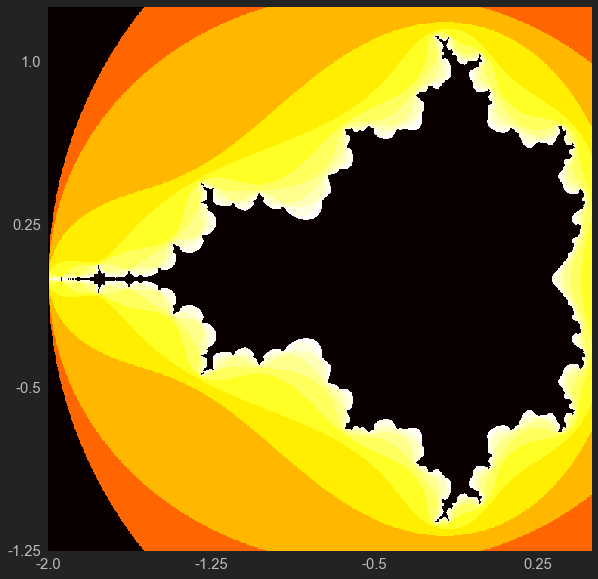

In [28]:
mandelbrot_d_image(xmin=-2.0,xmax=0.5,ymin=-1.25,ymax=1.25,width=10, height=10, maxiter=10, cmap='hot')

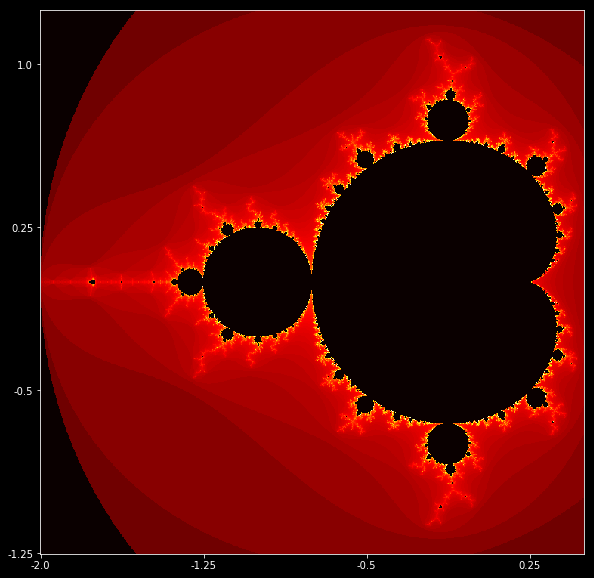

In [10]:
mandelbrot_d_image(xmin=-2.0,xmax=0.5,ymin=-1.25,ymax=1.25,width=10, height=10, maxiter=500, cmap='hot')

In [34]:
%%t
mandelbrot_dset(xmin=-2.0,xmax=0.5,ymin=-1.25,ymax=1.25,width=720, height=720, maxiter=500)

353 ms ± 4.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The above code gives you the basic picture.


1. What if we wanted to instead quantify how far off the iterates go off with color (instead of taking integer of first escape)? Then we need to have a float instead of an integer.
    
2. Is this quantitatively worth the effort?

3. What information does this give us about the case of the shift locus?



# 1. Attempt at the Continuous Escape Rate Algorithm

In [35]:
@jit
def mandelbrot_c(z,maxiter,bailout,bailout_est): # Iterate $f_c(0)$ until it escapes.
    c=z
    for n in range(maxiter):
        absz = abs(z)
        if absz > bailout:
            return n - np.log(np.log(absz))/np.log(2) + bailout_est  ## Continuous estimate of escape $n-\frac{\log\log\abs{z_n}}{}\log 2+b_est$.
        z = z*z + c
    return 0

@jit
def mandelbrot_c_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    bailout= 2**30
    bailout_est = np.log(np.log(bailout))/np.log(2) 
    
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    escape = np.empty((width,height))
    
    for i in range(width): ## Loop over each $c=x+yi$.
        for j in range(height):
            escape[i,j] = mandelbrot_c(x[i] + 1j*y[j], maxiter, bailout, bailout_est)
    return (x,y,escape)
    

In [36]:
def mandelbrot_c_image(xmin,xmax,ymin,ymax,width=10,height=10,\
                     maxiter=150,cmap='hot',gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_c_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm) 


In [37]:
%%t
mandelbrot_c_set(xmin=-2.0,xmax=0.5,ymin=-1.25,ymax=1.25,width=720, height=720, maxiter=500)

382 ms ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Some plots given by the continuous escape rate algorithm!

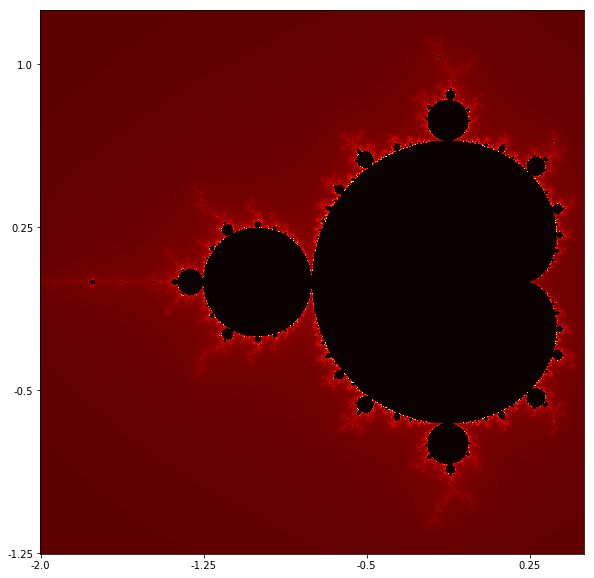

In [39]:
mandelbrot_c_image(xmin=-2.0,xmax=0.5,ymin=-1.25,ymax=1.25,width=10, height=10, maxiter=5014, cmap='hot')

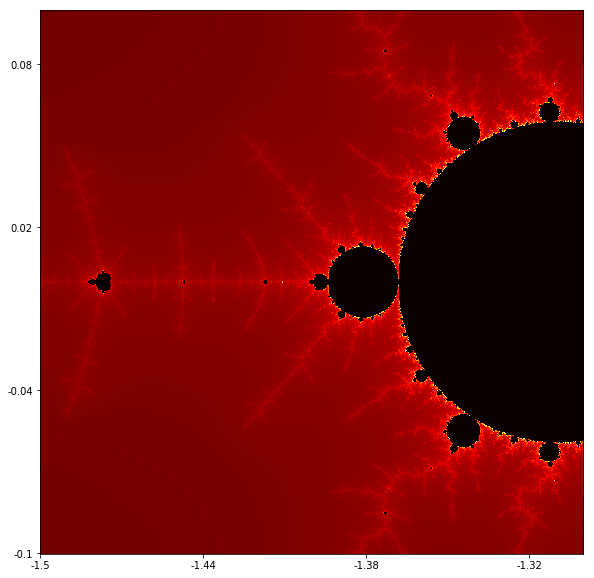

In [40]:
mandelbrot_c_image(xmin=-1.5,xmax=-1.3,ymin=-0.1,ymax=0.1,width=10, height=10, maxiter=5014, cmap='hot')

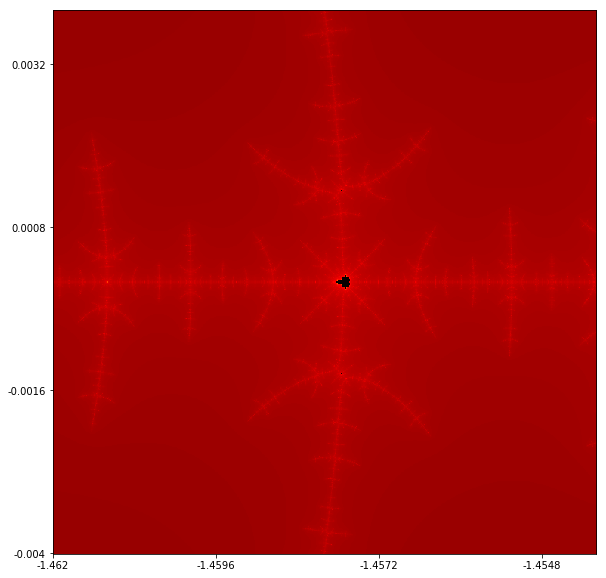

In [41]:
mandelbrot_c_image(xmin=-1.462,xmax=-1.454,ymin=-0.004,ymax=0.004,width=10, height=10, maxiter=4014, cmap='hot')

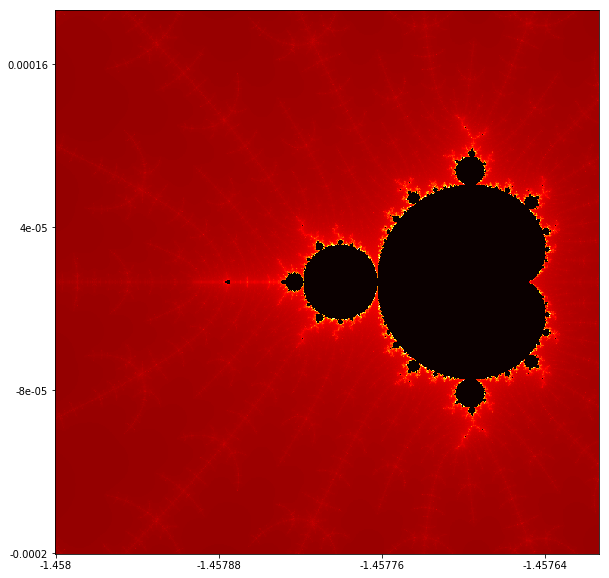

In [42]:
mandelbrot_c_image(xmin=-1.458,xmax=-1.4576,ymin=-0.0002,ymax=0.0002,width=10, height=10, maxiter=10000, cmap='hot')

In [43]:
###### Adding Zoom Function

# 2. Difference between Discrete Case and Continuous Bench Marks etc

Include speed benchmarks for the functions w/ the same number of iterations.

# 3. What information does this give us about the shift locus

We can try and adapt this to the next case with the reduced polynomial 
$z^3-a^2z+c$.

For shift locus (in case $d=3$), we need to identify critical points and see if they stay bounded. We can mimic the code for the polynomial $z^3+ az^2+bz+c$ (or alternatively the normal family $z^3-a^2z+b$), but we will need to employ a root finding algorithm on the derivative $3z^2+2az+b$ to find the critical points $z_1,z_2$ in the first place.

I will be using ... to find the roots, then checking to see if the orbit of one of the critical points stays within some bailout radius similar to the previous continuous case! Therefore, I will be finding points in the complement of the shift locus.

(Really need two colors, if $z_1$ escapes, if $z_2$ escapes)

In particular, I will be producing one dimensional slices of the shift locus using this method (identifying the space of degree 3 polynomials with $\mathbb{C}^2$. 

We will be using the normal form $f(z)=z^3-3a^2z+b$, where $f'(z)=3z^2-3a^2=3(z-a)(z+a)$ with roots $\pm a$. Therefore, our initial conditions will be 
$$z_1=a^3-3a^3+b=-2a^3+b$$

$$z_2=-a^3+3a^3+b=2a^3+b$$

In [67]:
@jit
def Shift_Locus_3(a, b, maxiter=50, bailout=4): ## Shift Locus in 3 dimensions
    
    Twoa3=2*a**3   ## $2a^3$
    Threea2=3*a**2 ## $3a^2$
    
    z1= Twoa3+b      ## First Iterate starting from a
    z2= -1*Twoa3 + b ## First Iterate starting from -a
    
    for n in range(maxiter):
        absz1 = abs(z1)
        absz2 = abs(z2)
        
        if min(absz1,absz2) > bailout: ## If both $z_1,z_2$ escape bailout radius
            return n
        ## Iterate again using $f(z)=z^3-3a^2z+b$.
        z1=z1**3-z1*Threea2+ b  
        z2=z2**3-3*z2*Threea2+ b
        
    return 0
@jit
def Shift_Locus_3_a_Set(b=0, xmin=-2,xmax=2,ymin=-2,ymax=2,width=10,height=10,maxiter=50): 
    ## Compute $a$-space given a specific $b\in\bbC$.
    
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    escape = np.empty((width,height))
    
    for i in range(width): ## Loop over $a=x+iy$.
        for j in range(height):
            escape[i,j] = Shift_Locus_3(a=x[i] + 1j*y[j], b=b, maxiter=maxiter)
    return (x,y,escape)
@jit
def Shift_Locus_3_b_Set(a=0, xmin=-2,xmax=2,ymin=-2,ymax=2, width=10,height=10,maxiter=50): 
        ## Compute $b$-space given a specific $a\in\bbC$.

    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    escape = np.empty((width,height))
    
    for i in range(width):
        for j in range(height):
            escape[i,j] = Shift_Locus_3(a=a, b= x[i] + 1j*y[j], maxiter=maxiter)
    return (x,y,escape)

In [70]:
def Shift_Locus_3_a_image(breal=0, bimag=0, xmin=-2,xmax=2,ymin=-2,ymax=2,width=10,height=10,\
                     maxiter=500,cmap='hot',gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = Shift_Locus_3_a_Set(breal+1j*bimag, xmin,xmax,ymin,ymax,img_width,img_height,maxiter=maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm) 

    
def Shift_Locus_3_b_image(areal=0, aimag=0, xmin=-2,xmax=2,ymin=-2,ymax=2,width=10,height=10,\
                     maxiter=100,cmap='hot',gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = Shift_Locus_3_b_Set(areal+1j*aimag, xmin,xmax,ymin,ymax,img_width,img_height,maxiter=maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm) 

In [72]:
%%t
Shift_Locus_3_a_Set(xmin=-2.0,xmax=2,ymin=-2,ymax=2 ,width=720, height=720, maxiter=500)

5.22 s ± 2.19 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [66]:
%%t
Shift_Locus_3_b_Set(xmin=-2.0,xmax=2,ymin=-2,ymax=2 ,width=720, height=720, maxiter=500)

5.35 s ± 77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


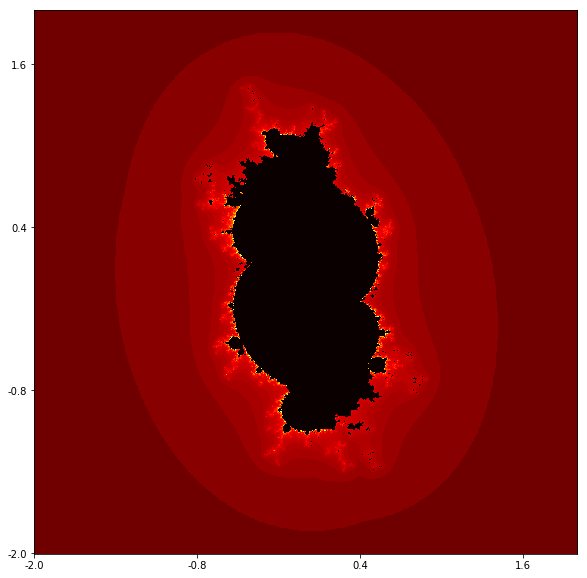

In [6]:
Shift_Locus_3_b_image(areal=-0.2, aimag= 0.2, maxiter=500)

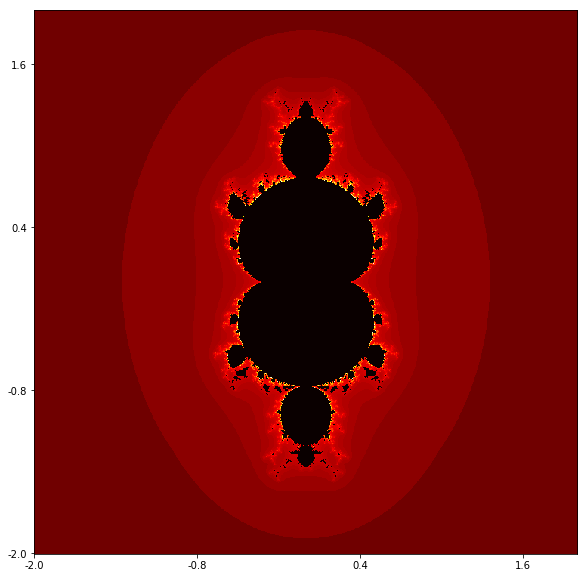

In [7]:
Shift_Locus_3_b_image(areal=0, aimag= 0.2, maxiter=500)

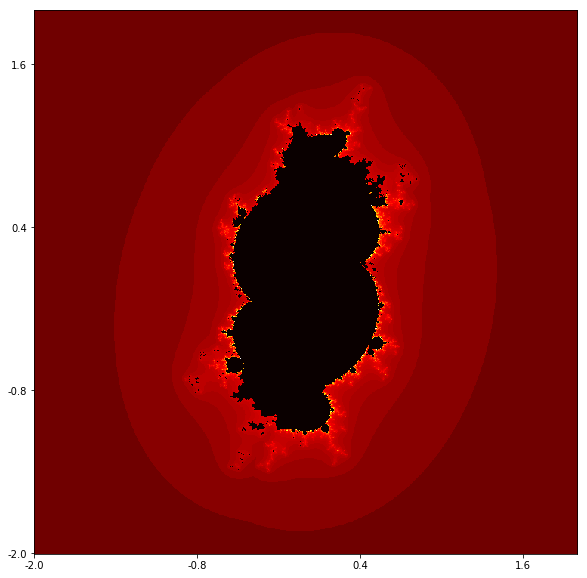

In [8]:
Shift_Locus_3_b_image(areal=0.2, aimag= 0.2, maxiter=500)

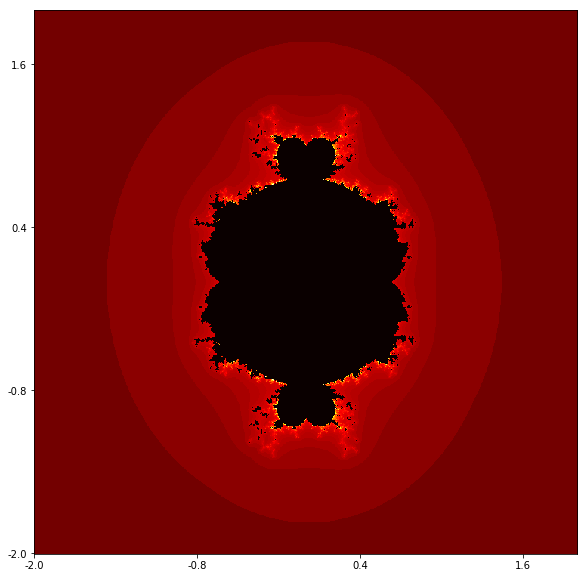

In [9]:
Shift_Locus_3_b_image(areal=-0.2, aimag= 0, maxiter=500)

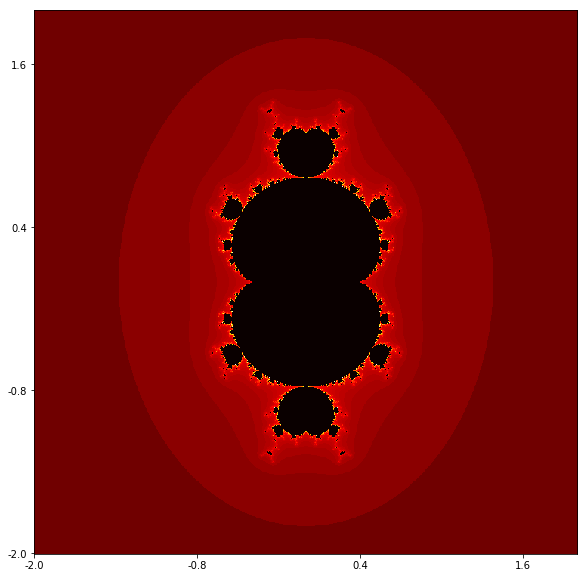

In [10]:
Shift_Locus_3_b_image(areal=0, aimag= 0, maxiter=500)

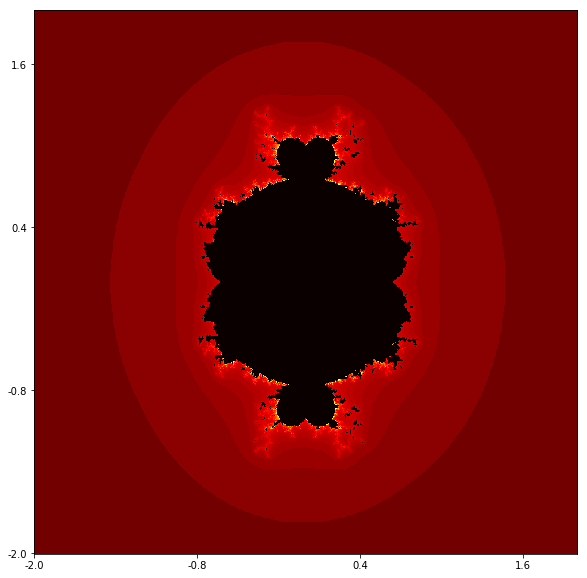

In [11]:
Shift_Locus_3_b_image(areal=0.2, aimag= 0, maxiter=500)

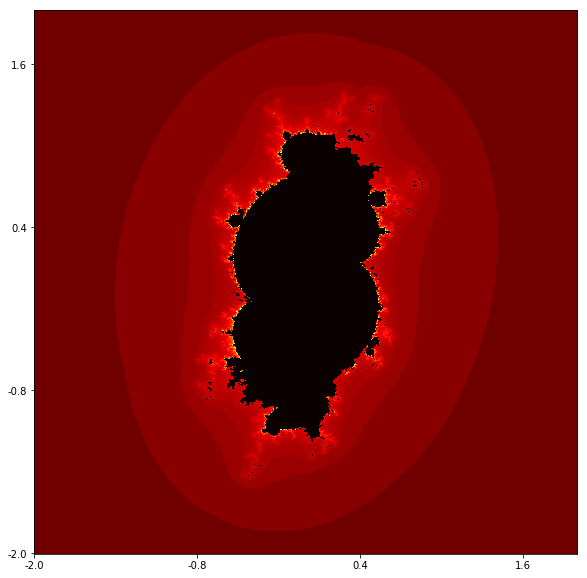

In [13]:
Shift_Locus_3_b_image(areal=-0.2, aimag= -0.2, maxiter=500)

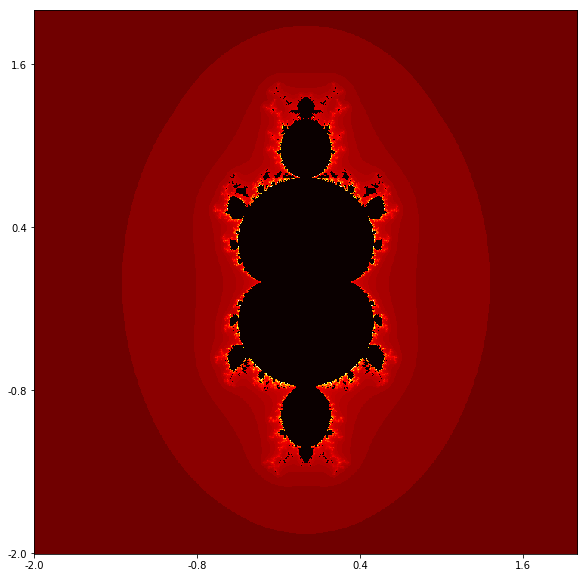

In [14]:
Shift_Locus_3_b_image(areal=0, aimag= -0.2, maxiter=500)

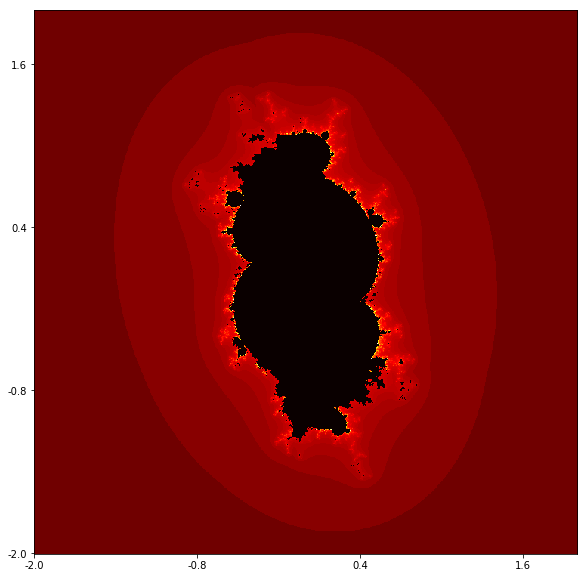

In [15]:
Shift_Locus_3_b_image(areal=0.2, aimag= -0.2, maxiter=500)

## Widget for moving through $a$ space!

In [9]:
from ipywidgets import interact, fixed
interact(Shift_Locus_3_b_image, areal=(-1,1,0.05), aimag=(-1,1,0.05),  cmap=fixed('hot'),xmin=fixed(-2),xmax=fixed(2),ymin=fixed(-2),ymax=fixed(2) , maxiter=fixed(500), width=fixed(10), height=fixed(10), gamma=fixed(0.3))

interactive(children=(FloatSlider(value=0.0, description='areal', max=1.0, min=-1.0, step=0.05), FloatSlider(v…

<function __main__.Shift_Locus_3_b_image>

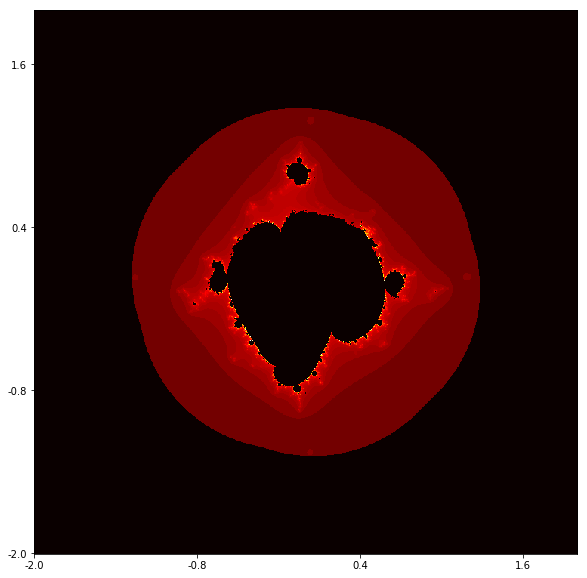

In [32]:
Shift_Locus_3_a_image(breal=-0.2, bimag=0.2, maxiter=500)

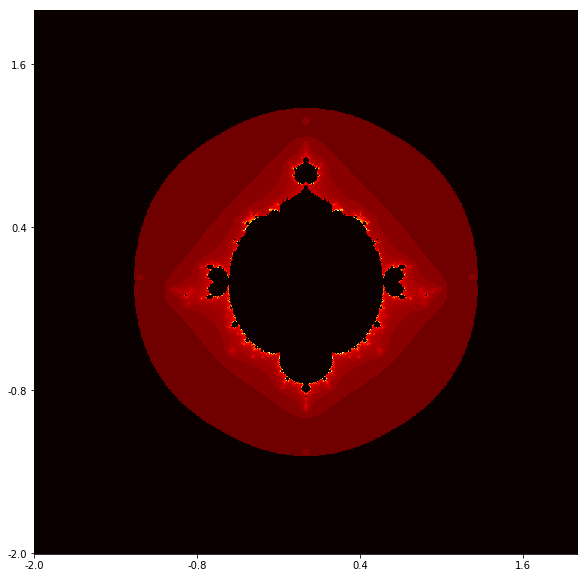

In [33]:
Shift_Locus_3_a_image(breal=0, bimag=0.2, maxiter=500)

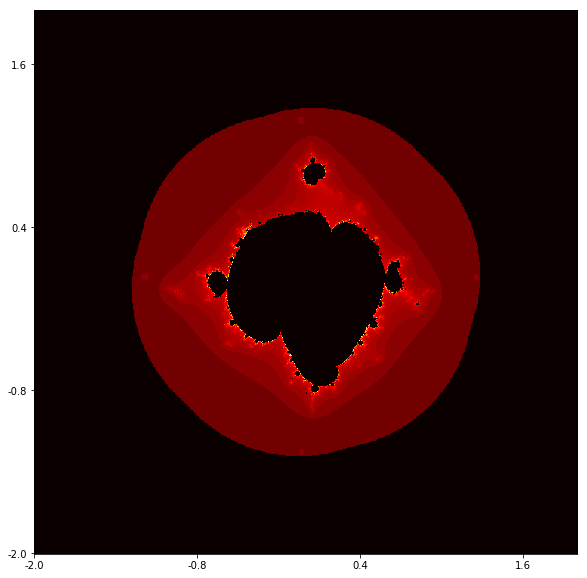

In [41]:
Shift_Locus_3_a_image(breal=0.2, bimag=0.2, maxiter=500)

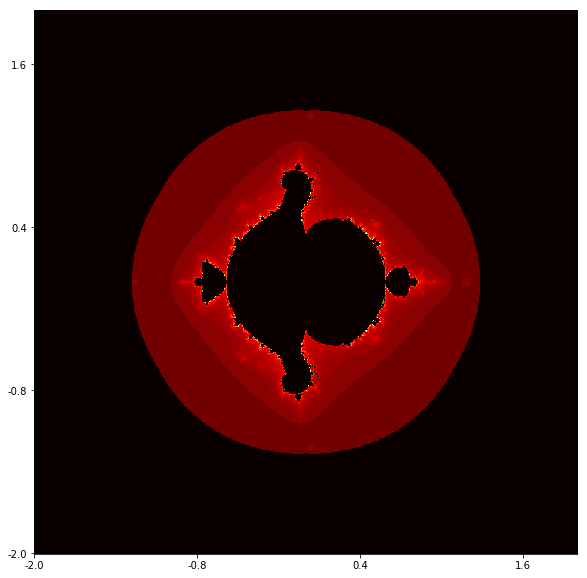

In [42]:
Shift_Locus_3_a_image(breal=-0.2, bimag=0, maxiter=500)

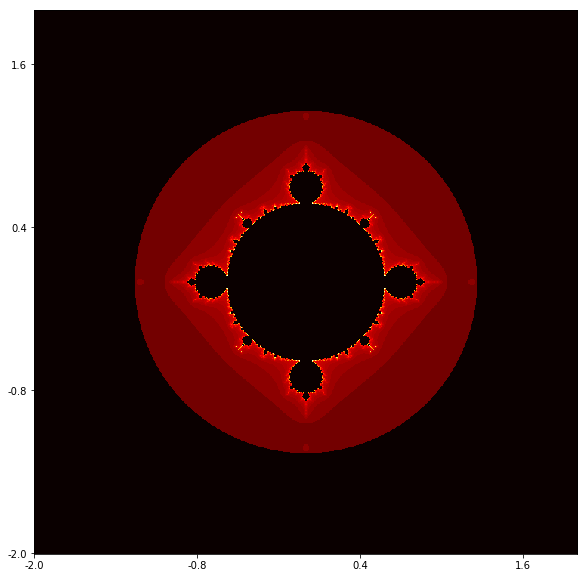

In [43]:

Shift_Locus_3_a_image(breal=0, bimag=0, maxiter=500)

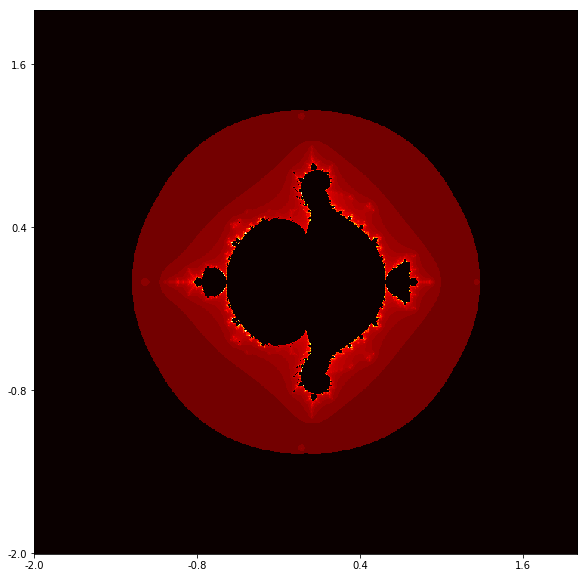

In [44]:
Shift_Locus_3_a_image(breal=0.2, bimag=0, maxiter=500)

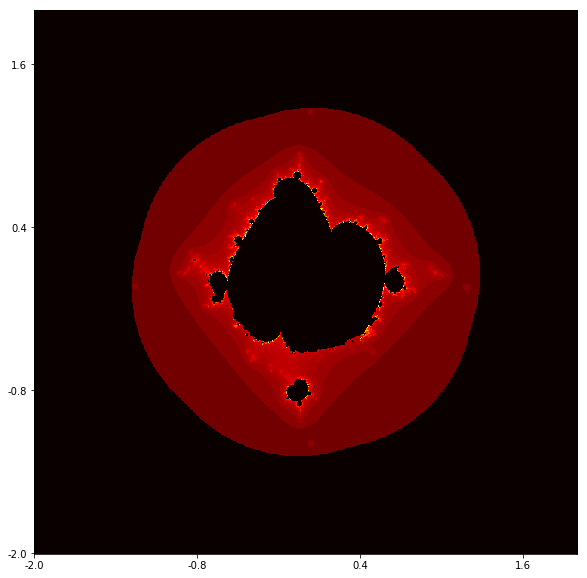

In [45]:
Shift_Locus_3_a_image(breal=-0.2, bimag=-.2, maxiter=500)

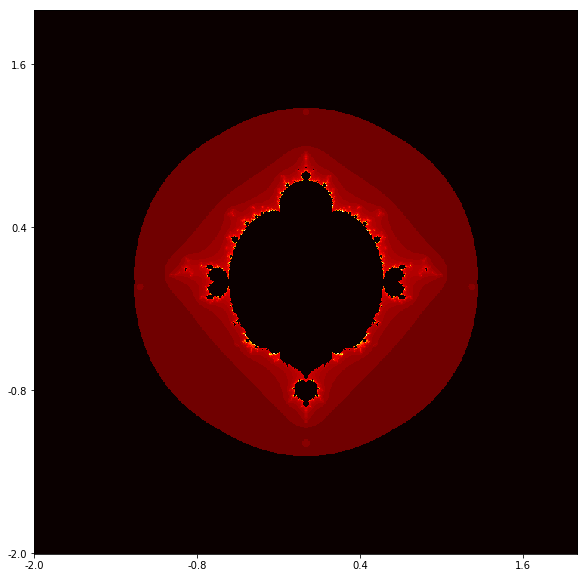

In [46]:
Shift_Locus_3_a_image(breal=0, bimag=-0.2, maxiter=500)

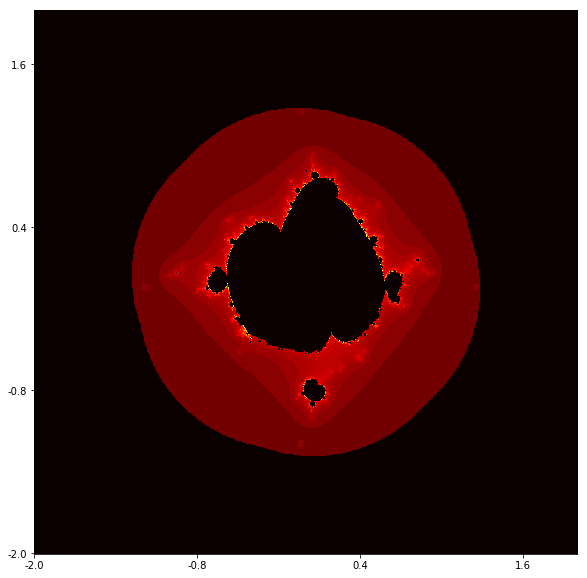

In [47]:
Shift_Locus_3_a_image(breal=0.2, bimag=-0.2, maxiter=500)

In [48]:
## Widget for moving through $b$ space!

In [10]:
from ipywidgets import interact, fixed
interact(Shift_Locus_3_a_image, breal=(-1,1,0.05), bimag=(-1,1,0.05),  cmap=fixed('hot'),xmin=fixed(-2),xmax=fixed(2),ymin=fixed(-2),ymax=fixed(2) , maxiter=fixed(500), width=fixed(10), height=fixed(10), gamma=fixed(0.3))

interactive(children=(FloatSlider(value=0.0, description='breal', max=1.0, min=-1.0, step=0.05), FloatSlider(v…

<function __main__.Shift_Locus_3_a_image>

## Computation of Julia Sets

In [2]:
@jit
def julia(c, z, maxiter): ## Iterate $f_c(z)$ until it escapes
    for n in range(maxiter):
        if abs(z) > 4: ## If $f_c^n(z)$ escapes
            return n
        z = z*z + c
    return 0

@jit
def julia_set(creal, cimag, width=10, height=10, maxiter=200, xmin=-2,xmax=2,ymin=-1,ymax=1):
    
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    escape = np.empty((width,height))
    
    for i in range(width): ## Loop over each $z=x+yi$.
        for j in range(height):
            escape[i,j] =julia(creal+1j*cimag, x[i] + 1j*y[j], maxiter)
    return (x,y,escape)

In [3]:
def julia_image(creal, cimag ,xmin=-2,xmax=2,ymin=-1,ymax=1,width=100,height=100,\
                     maxiter=100,cmap='hot'):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = julia_set(creal, cimag, img_width, img_height, maxiter, xmin,xmax,ymin,ymax)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    ax.imshow(z.T,cmap=cmap,origin='lower') 

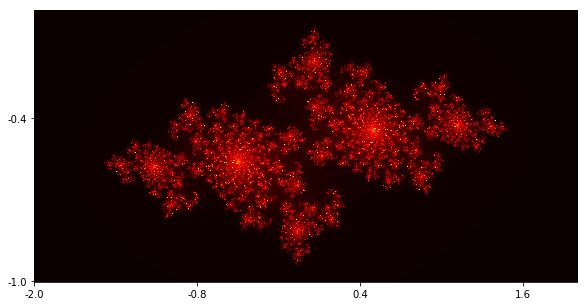

In [4]:
julia_image(creal = -0.73, cimag= -0.2321, maxiter=500, width=10, height=5)

In [4]:
%%t 
julia_set(creal = -0.73, cimag= -0.2321, maxiter=500, width=720, height=720, ymin=-2, ymax=2)

29.1 ms ± 763 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


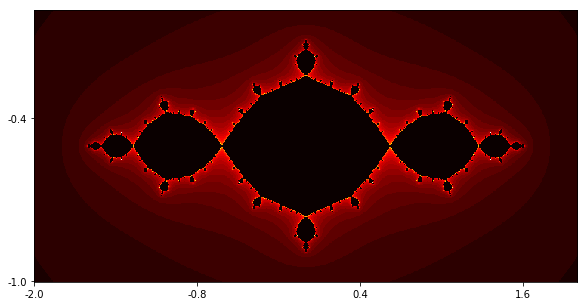

In [9]:
julia_image(creal = -1, cimag= 0, maxiter=200, width=10, height=5)

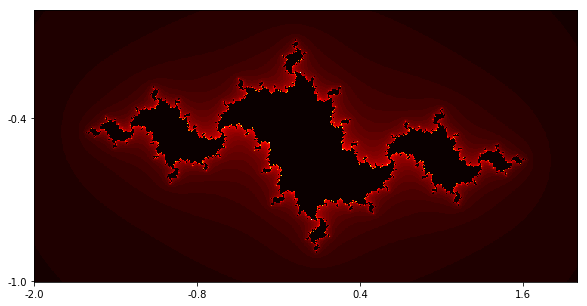

In [10]:
julia_image(creal = -1, cimag= 0.22, maxiter=1000, width=10, height=5)

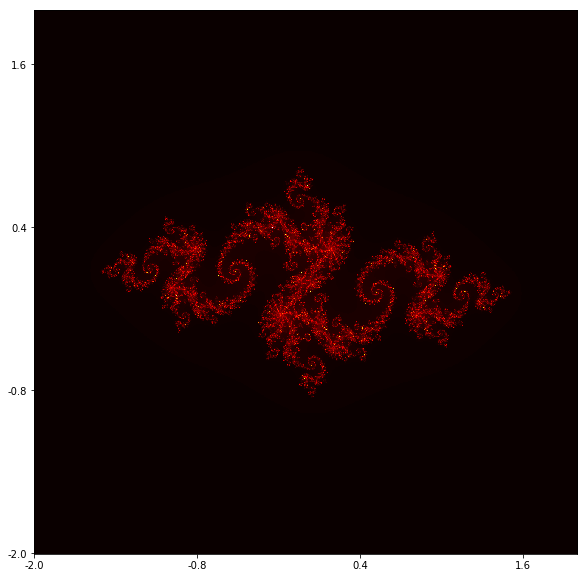

In [5]:
julia_image(creal = -.79, cimag= .15, maxiter=1000, width=10, height=10, ymin=-2, ymax=2)

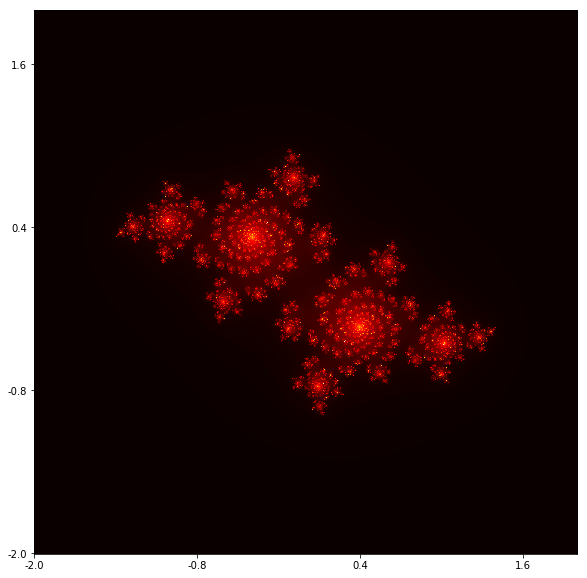

In [46]:
julia_image(creal = -.44, cimag= .59, maxiter=1000, width=10, height=10, ymin=-2, ymax=2)

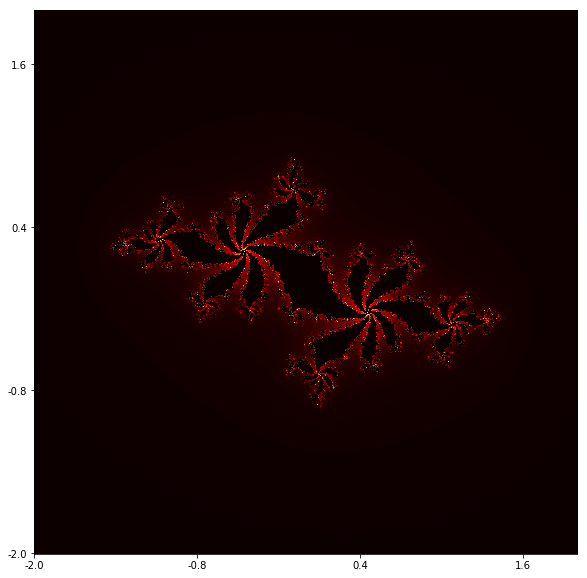

In [55]:
julia_image(creal = -0.62, cimag= 0.437, maxiter=1000, width=10, height=10, ymin=-2, ymax=2)

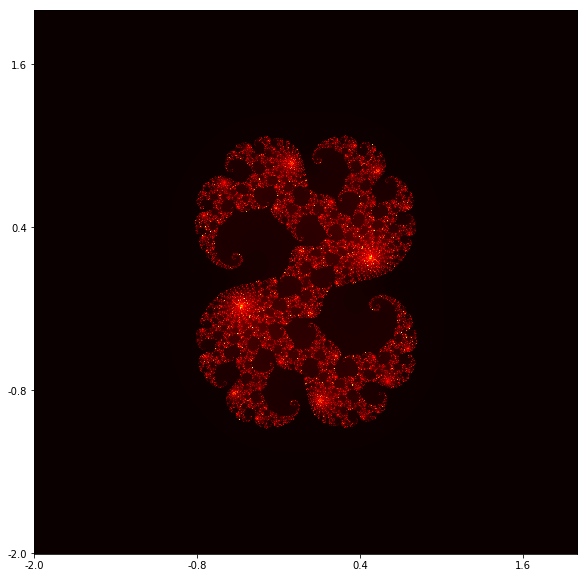

In [50]:
julia_image(creal = .28, cimag= .009, maxiter=1000, width=10, height=10, ymin=-2, ymax=2)

In [47]:
from ipywidgets import interact, fixed
interact(julia_image, creal=(-1,1,0.05), cimag=(-1,1,0.05),  cmap=fixed('hot'),xmin=fixed(-2),xmax=fixed(2),ymin=fixed(-2),ymax=fixed(2) , maxiter=fixed(1000), width=fixed(10), height=fixed(10))

interactive(children=(FloatSlider(value=0.0, description='creal', max=1.0, min=-1.0, step=0.05), FloatSlider(v…

<function __main__.julia_image>

Computing Juia Set of $z+\frac{1}{z}$.

In [4]:
def julia_gen(f, z, maxiter): ## Iterate $f(z)$ until it escapes
    for n in range(maxiter):
        absz = abs(z)
        if absz > 4: ## If $f_c^n(z)$ escapes
            return n
        z=f(z)
    return 0

def julia_gen_set(f, width=10, height=10, maxiter=200, xmin=-2,xmax=2,ymin=-1,ymax=1):
    
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    escape = np.empty((width,height))
    
    for i in range(width): ## Loop over each $z=x+yi$.
        for j in range(height):
            escape[i,j] =julia_gen(f, x[i] + 1j*y[j], maxiter)
    return (x,y,escape)

In [5]:
def julia_gen_image(f, xmin=-2,xmax=2,ymin=-1,ymax=1,width=100,height=100,\
                     maxiter=100,cmap='hot'):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = julia_gen_set(f, img_width, img_height, maxiter, xmin,xmax,ymin,ymax)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    ax.imshow(z.T,cmap=cmap,origin='lower') 

In [6]:
def f(z): 
    return z**2+ -0.73 - 0.2321*1j

In [8]:
%%t
julia_gen_set(f, maxiter=500, width=720, height=720, ymin=-2, ymax=2)

5.95 s ± 331 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
def f(z): 
    return z**3+1/(z**3)

In [ ]:
julia_gen_image(f, maxiter=500, width=10, height=10, ymin=-2, ymax=2)

In [ ]:
def f(z): 
    return 2*z**4-1
julia_gen_image(f, maxiter=500, width=10, height=10, ymin=-2, ymax=2)

In [ ]:
def f(z): 
    return (1j*z**5-1)/(z**5-1j)
julia_gen_image(f, maxiter=500, width=10, height=10, ymin=-2, ymax=2)

In [ ]:
def f(z): 
    return 0.75*z**4-1
julia_gen_image(f, maxiter=500, width=10, height=10, ymin=-2, ymax=2)

In [ ]:
def f(z): 
    return (z**2+1j)/(1-z**2)
julia_gen_image(f, maxiter=500, width=10, height=10, ymin=-2, ymax=2)

## Julia Sets of the family $f_{a,b}(z)=z^3-3a^2z+b$

In [22]:
@jit
def julia3(a, b, z, maxiter):  # Iterate $f_{a,b}(z)=z^3-a^2z+b$ until it escapes
    Threea2 = 3*a**2  # Pre-allocate $3a^2$.
    for n in range(maxiter):
        if abs(z) > 4:  # If $f_{a,b}(z)$ escapes, return $n$.
            return n
        z = z*z*z - Threea2*z + b
    return 0


@jit
def julia3_set(a, b, width=10, height=10, maxiter=200, xmin=-2,xmax=2,ymin=-1,ymax=1):
    
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    escape = np.empty((width,height))
    
    for i in range(width): ## Loop over each $z=x+yi$.
        for j in range(height):
            escape[i,j] =julia3(a, b, x[i] + 1j*y[j], maxiter)
    return (x,y,escape)

In [23]:
def julia3_image(a=0, b=0 ,xmin=-2,xmax=2,ymin=-1,ymax=1,width=100,height=100,\
                     maxiter=100,cmap='hot'):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = julia3_set(a, b, img_width, img_height, maxiter, xmin,xmax,ymin,ymax)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    ax.imshow(z.T,cmap=cmap,origin='lower') 

In [75]:
%%t
julia3_set(a=0.8, b=0 ,maxiter=500, width=720, height=720, ymin=-2, ymax=2)

154 ms ± 2.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


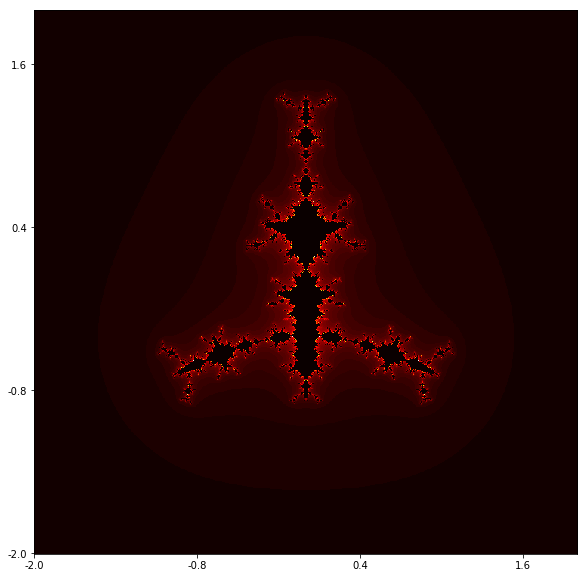

In [196]:
julia3_image(a=1j*0.39, b=1.11*1j,maxiter=500, width=10, height=10, ymin=-2, ymax=2)

# Applying (Möbius) Transformations to the Plane

In [ ]:
### START WITH APPROPRIATE GRID 

### REPRESENT COORDINATE AT A POINT USING BOTH HUE AND SATURATION? 

# Newton's Method for Finding Basins of Attraction

We will be basing this off of the Newton's function

$$ N(x)=x-\frac{f(x)}{f'(x)} $$.

Given a function $f$ and $x\in \mathbb{C}$, we will iterate the point $x$ using $N$ until our point is within some tolerance of a root! 



In [ ]:
### Case z^5-1
@jit
def Newtons_Meth_gen(funcvalue, Dfvalue, x, roots, tolerance,maxiter=15):
    for i in range(maxiter):
        x=x-funcvalue/Dfvalue 
        for root in roots:
            if abs(x-root)< tolerance:
                return root
            


In the case of $f(z)=z^5-1$, we have 
$$N(z)=z-\left(\frac{z^5-1}{5z^4}\right)=\frac{4}{5}z+\frac{1}{5z^4},$$
where the roots of $f$ are given by the $5$th roots of unity.

In [ ]:
def Newtons_Meth5(z, roots, tolerance,maxiter=100):
    for n in range(maxiter):
        z=z-(z**5-1)/(5*z**4)
        for k in range(5):
            if abs(z-roots[k])< tolerance:
                return k
            
def Newtons_Set(xmin=-2,xmax=2,ymin=-1,ymax=1,width=20,height=20, maxiter=500):
    
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    rootclose = np.empty((width,height))
    
    roots=np.roots([1, 0, 0, 0, 0, -1])
    tolerance=0.1
    
    for i in range(width):
        for j in range(height):
            rootclose[i,j] = Newtons_Meth5(x[i]+1J*y[j], roots, tolerance, maxiter=maxiter)  
    return (x,y,rootclose)

In [ ]:
@jit
def Newtons_Meth(z, roots, tolerance,maxiter=100):
    for n in range(maxiter):
        z=z-(z**5-1)/(5*z**4)
        for k in range(5):
            if abs(z-roots[k])< tolerance:
                return k
            
def Newtons_Set(xmin=-2,xmax=2,ymin=-1,ymax=1,width=20,height=20, maxiter=500):
    
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    rootclose = np.empty((width,height))
    
    roots=np.roots([1, 0, 0, -1])
    tolerance=0.1
    
    for i in range(width):
        for j in range(height):
            rootclose[i,j] = Newtons_Meth(x[i]+1J*y[j], roots, tolerance, maxiter=maxiter)  
    return (x,y,rootclose)

In [ ]:
def Newtons_Imag(xmin=-1,xmax=1,ymin=-1,ymax=1,width=100,height=100,\
                     maxiter=100):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
           
    x,y,z = Newtons_Set(xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,width=img_width,height=img_height, maxiter=maxiter)


    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    ax.imshow(z.T, cmap='hot',origin='lower') 

In [ ]:
Newtons_Imag(xmin=-1,xmax=1,ymin=-1,ymax=1,width=11,height=11, maxiter=200)